In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

raw_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/타이타닉생존/titanic.xls')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
'''
pclass : 객실 등급
survived : 생존 유무
sex : 성별
age : 나이
sibsp : 형제 혹은 부부의 수
parch : 부모, 혹은 자녀의 수
fare : 지불한 운임
boat : 탈출한 보트가 있다면 boat 번호
'''

'\npclass : 객실 등급\nsurvived : 생존 유무\nsex : 성별\nage : 나이\nsibsp : 형제 혹은 부부의 수\nparch : 부모, 혹은 자녀의 수\nfare : 지불한 운임\nboat : 탈출한 보트가 있다면 boat 번호\n'

In [4]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


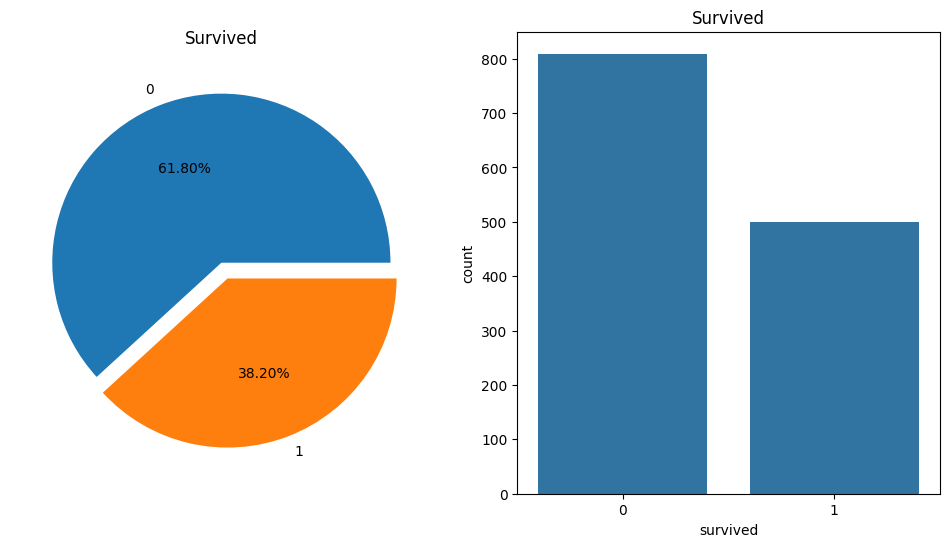

In [12]:
f,ax=plt.subplots(1,2,figsize=(12,6))

raw_data['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='survived',data=raw_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

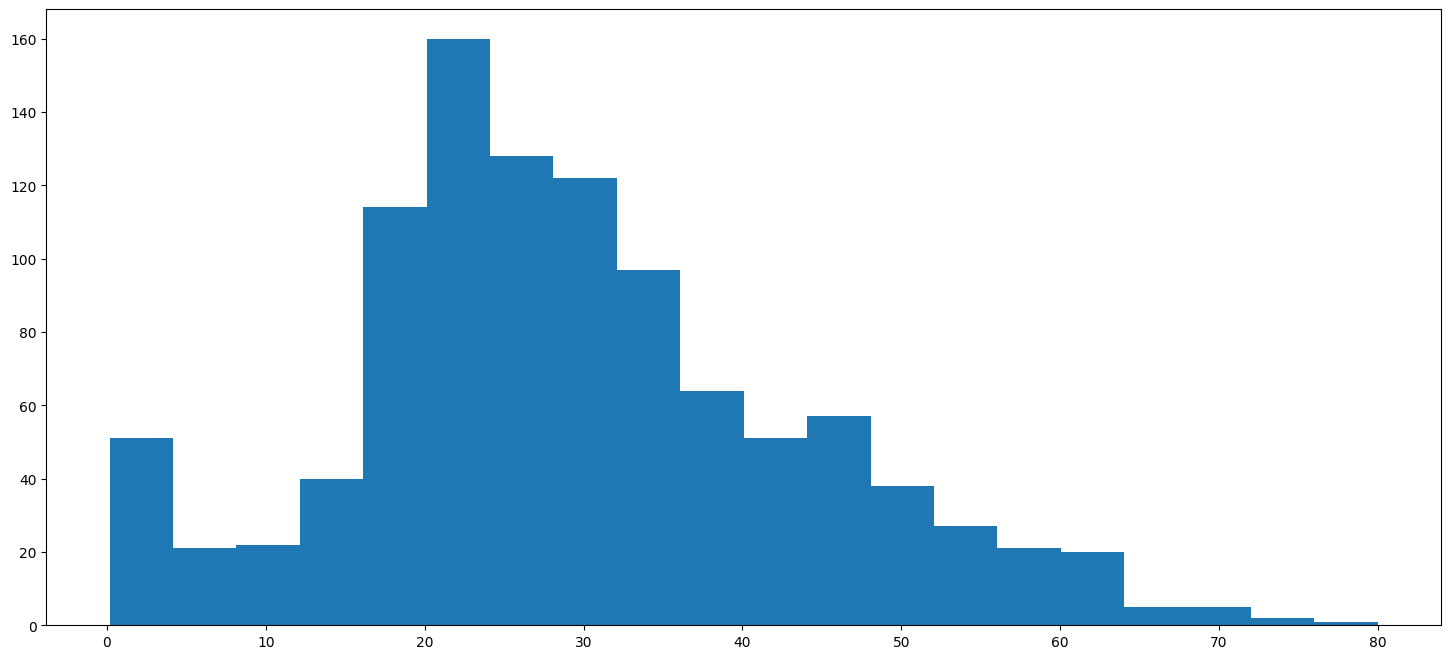

In [13]:
raw_data['age'].hist(bins=20,figsize=(18,8),grid=False);

In [20]:
raw_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
raw_data['pclass']

0       1
1       1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

ValueError: could not convert string to float: 'Allen, Miss. Elisabeth Walton'

<Figure size 1000x1000 with 0 Axes>

In [22]:
tmp = []
for each in raw_data['sex']:
    if each == 'female':
        tmp.append(1)
    elif each == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)

raw_data['sex'] = tmp

raw_data['survived'] = raw_data['survived'].astype('float')
raw_data['pclass'] = raw_data['pclass'].astype('float')
raw_data['sex'] = raw_data['sex'].astype('float')
raw_data['sibsp'] = raw_data['sibsp'].astype('float')
raw_data['parch'] = raw_data['parch'].astype('float')
raw_data['fare'] = raw_data['fare'].astype('float')

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1045 non-null   float64
 1   survived   1045 non-null   float64
 2   name       1045 non-null   object 
 3   sex        1045 non-null   float64
 4   age        1045 non-null   float64
 5   sibsp      1045 non-null   float64
 6   parch      1045 non-null   float64
 7   ticket     1045 non-null   object 
 8   fare       1045 non-null   float64
 9   cabin      272 non-null    object 
 10  embarked   1043 non-null   object 
 11  boat       417 non-null    object 
 12  body       119 non-null    float64
 13  home.dest  685 non-null    object 
dtypes: float64(8), object(6)
memory usage: 122.5+ KB


In [23]:
x_data = raw_data.values[:, [0,3,4,5,6,8]]
y_data = raw_data.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.1, random_state=7)

In [25]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Permute
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.15.0
keras version :  2.15.0


In [26]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 255)               1785      
                                                                 
 dense_1 (Dense)             (None, 1)                 256       
                                                                 
Total params: 2041 (7.97 KB)
Trainable params: 2041 (7.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


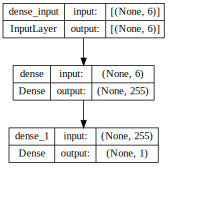

In [30]:
from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [32]:
X_train

array([[3.0, 1.0, 45.0, 0.0, 0.0, 7.75],
       [2.0, 1.0, 24.0, 1.0, 0.0, 27.7208],
       [1.0, 0.0, 47.0, 0.0, 0.0, 52.0],
       ...,
       [2.0, 0.0, 26.0, 0.0, 0.0, 13.0],
       [2.0, 1.0, 0.9167, 1.0, 2.0, 27.75],
       [1.0, 1.0, 24.0, 0.0, 0.0, 49.5042]], dtype=object)

In [ ]:
X_test

In [35]:
import numpy as np

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

In [42]:
cjk=np.array([3., 0., 19., 0., 0., 5.])
print(cjk.shape)
cjk.reshape(1,6)
print(cjk.shape)

(6,)
(6,)


In [43]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

In [44]:
model.predict(dicaprio)

1/1 [==============================] - 0s 208ms/step


array([[0.07364033]], dtype=float32)

In [45]:
model.predict(winslet)

1/1 [==============================] - 0s 24ms/step


array([[0.9999999]], dtype=float32)

In [46]:
model.save("test.cjkpt")